# Hypothesis Testing: Data Science Salary Comparision in Two Different Regions

## 1. Introduction

**1.1 Background**

Recent trend has shown data science has become one of the most popular career options. However, it's crucial to recognize that salary can vary significantly based on factors such as location and company (Situ et al., 2017). Therefore, it's essential to weigh all aspects when choosing between different job offers (Robinson et al., 2020). As a result, analyzing the difference in salary between different regions can help employees choose the place to start their journey as data scientists. 

**1.2 Question**

Research Question: **Is there a difference in the salary of jobs related to data science between Europe and North America?**

Our response variable is the data science job salary, and we will use the difference in **mean** salary and **standard deviation** of the salary to evaluate the question.

**1.3 Dataset**

Our dataset is from Kaggle, which includes information regarding the data science jobs’ salaries in different locations during 2020-2022. These data were scraped by Ruchi Bhatia from https://salaries.ai-jobs.net/ (Bhatia, 2022). 

Below variables are related to our study:

1. company_location - The country of the employer's main office.
2. location - Regions where employees work (created based on company_location, either Europe or North America)
3. salary_in_usd - The salary in USD


## 2. Preliminary Results

**2.1 Data Cleaning**

In [1]:
# load necessary packages
library(infer)
library(tidyverse)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
raw_salary <- read.csv("https://raw.githubusercontent.com/YuluDuan/Hypothesis-Testing-Data-Science-salary-comparison-in-different-location/main/ds_salaries.csv")

head(raw_salary)

,X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In this project, as we would focus on analyzing the salary in both Europe and North America, it is important to first filter out all the data that belongs to these two regions and select the necessary columns (i.e. location and salary_in_usd).

In [3]:
# by checking all the countries in this list, first find out the countries that belongs to Europe and North America.

na <- c("US", "MX","CA")
eur <- c("DE", "GB", "HU", "FR", "GR", "NL", "AT", "ES", "PT", "DK", "IT", "HR", "LU"
         ,"PL", "RO", "BE", "UA", "RU", "MT", "MD", "SI", "CH", "CZ", "EE", "IE")

In [4]:
# fliter out all rows belong to Europe and North America, save them to a new column called "location"

ds_salary <- raw_salary %>%
    filter(company_location %in% append(na, eur)) %>%
    mutate(location = "North America")

ds_salary$location[ds_salary$company_location %in% eur] <- "Europe"

ds_salary$location <- as.factor(ds_salary$location)

In [5]:
# create the final data set for this project by selecting columns that would be useful.
ds_final <- ds_salary %>%
    select(salary_in_usd, location)
head(ds_final) # overview of the data

,salary_in_usd,location
,<int>,<fct>
1,79833,Europe
2,109024,Europe
3,150000,North America
4,72000,North America
5,190000,North America
6,35735,Europe


From here, we can now provide overview of the data by constructing summary and plots. 

**2.2 Data Summary and Visualization**

From the summary below, we can see that for Europe, the sample mean salary is 69358.37, while for North America, the sample mean salary is 139769.85. 

* Table 1. Summary of the salaries in two regions

In [6]:
# create the summary of key information related to salary
ds_eur <- ds_final %>%
    filter(location == "Europe")
ds_na <- ds_final %>%
    filter(location == "North America")

summary_eur <- summary(ds_eur$salary_in_usd)
summary_na <- summary(ds_na$salary_in_usd)

location <- c("Europe", "North America")
mini <- c(summary_eur[1], summary_na[1])
quan_1 <- c(summary_eur[2], summary_na[2])
median <- c(summary_eur[3], summary_na[3])
mean <- c(summary_eur[4], summary_na[4])
quan_3 <- c(summary_eur[5], summary_na[5])
max <- c(summary_eur[6], summary_na[6])
sample_size <- summary(ds_final$location)
sd <- c(sd(ds_eur$salary_in_usd), sd(ds_na$salary_in_usd))
table1 <- data.frame(minimum_salary = mini, first_quantile = quan_1, 
                     median_salary = median, mean_salary = mean, third_quantile = quan_3, maximum_salary = max, standard_deviation = sd,sample_size)
table1

,minimum_salary,first_quantile,median_salary,mean_salary,third_quantile,maximum_salary,standard_deviation,sample_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Europe,5882,46597.0,63831,69358.37,87932,230000,35261.06,157
North America,2859,99037.5,130400,139769.85,170000,600000,69754.52,388


Next we create the histogram of salary for both regions to help us understand the distribution.

* Figure 1: Histograms of Salary in Europe and North America

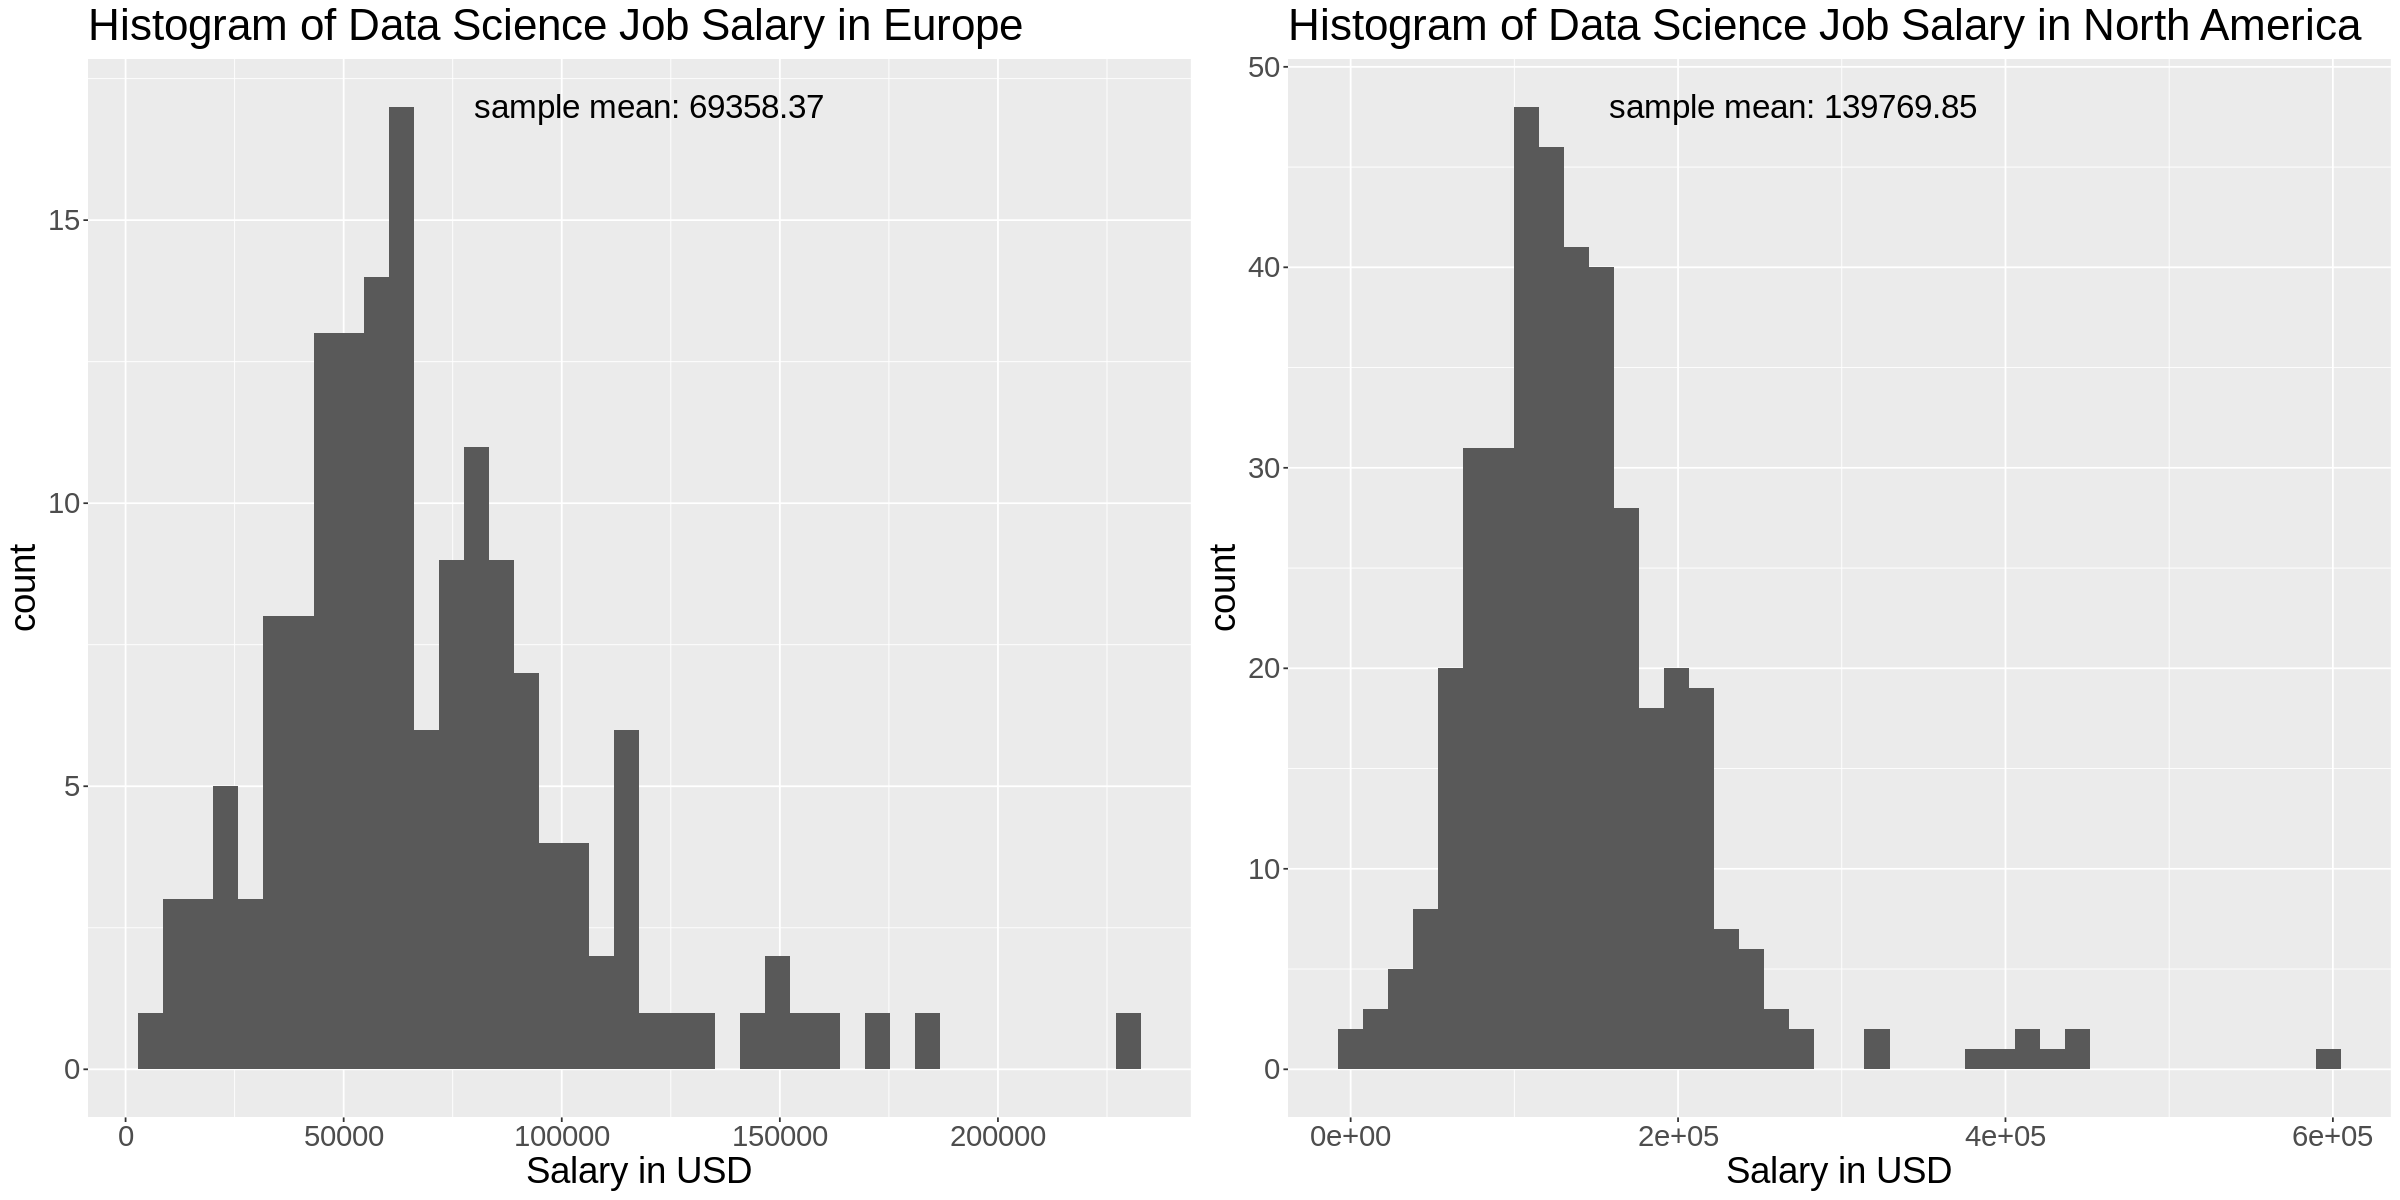

In [8]:
## create the two distributions

options(repr.plot.width= 20, repr.plot.height=10)
histogram_europe <- ds_final %>%
    filter(location == "Europe") %>%
    ggplot(aes(x = salary_in_usd)) +
    geom_histogram(bins = 40) +
    theme(text = element_text(size = 22)) +
    xlab("Salary in USD") + 
    ylab("count")+
    ggtitle("Histogram of Data Science Job Salary in Europe") + 
    geom_vline(xintercept = table1$mean_wage[1], color = "red", size = 2) + #add the line of sample mean
    annotate("text", x = 120000, y = 17, label = "sample mean: 69358.37", size = 7) 

histogram_na <- ds_final %>%
    filter(location == "North America") %>%
    ggplot(aes(x = salary_in_usd),color = 'white') +
    geom_histogram(bins = 40) +
    theme(text = element_text(size = 22)) + 
    xlab("Salary in USD") + 
    ylab("count")+
    ggtitle("Histogram of Data Science Job Salary in North America") +
    geom_vline(xintercept = table1$mean_wage[2], color = "red", size = 2) + #add the line of sample mean
    annotate("text", x = 270000, y = 48, label = "sample mean: 139769.85", size = 7) 

plot_grid(histogram_europe, histogram_na, labels = c('', ''))

For hypothesis testing, the summary itself is not enough as we cannot tell the variability in our data. Hence, we also want to look at the spread of salaries for each region, which we can roughly compare by boxplot.

* Figure 2: Boxplot of the salaries in two regions

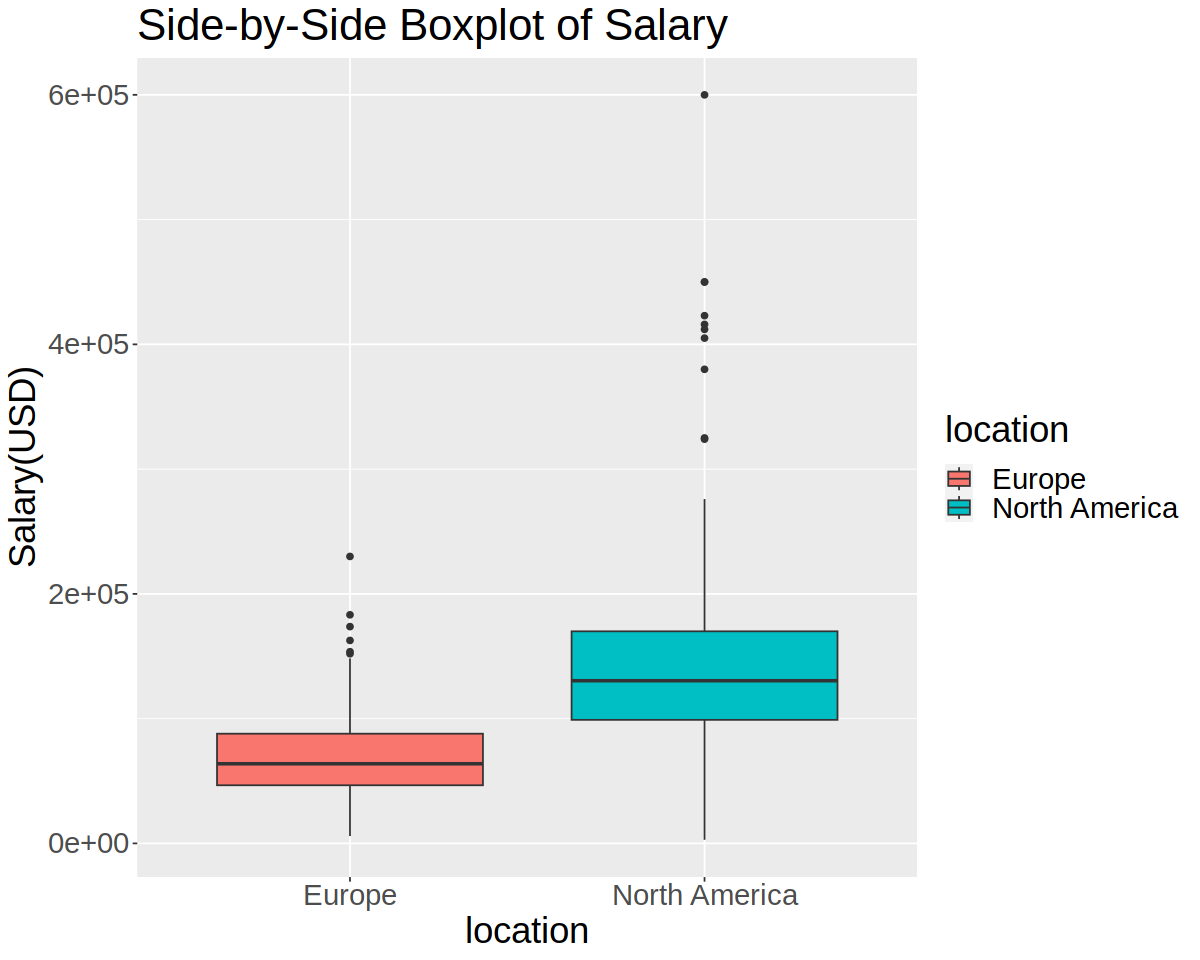

In [51]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot_ds <- ggplot(ds_final, aes(x = location, y = salary_in_usd, fill = location)) +
    geom_boxplot() +
    theme(text = element_text(size = 22)) +
    ylab("Salary(USD)") +
    ggtitle("Side-by-Side Boxplot of Salary")
    
boxplot_ds

## 3. Methods: Plan

**3.1 Potential Strength of the Report**

The report would be useful in learning about the current data science job markets as the data come from real data science job studies in recent years. In addition, with a fairly large sample size, the data can lead to more accurate and representative results.

**3.2 Method and Plan**

The plots and estimates produced above are not enough to give to a stakeholder because as we're working with a sample, we must report a range of plausible values, rather than a single point estimate. For this study, we will use the method of hypothesis testing with 95% confidence interval to find out if a significant difference exists between the salaries in the two regions. In addition to data cleaning, Our study will compose of four parts: sampling, calculation of sample statistics, construction of confidence interval, and visualization.

We first perform hypothesis testing with $\alpha$ = 0.05 for:

Null Hypothesis (H<sub>0</sub>): there is no difference in the true mean salary between data science jobs in North American and Europe \
Alternative Hypothesis (H<sub>a</sub>): there is a difference in the true mean salary between these two regions.

Next we will performing a two-tailed test. After utilizing both bootstrapping and asymptotics methods, we will produce confidence intervals to report a range of plausible values alongside our statistics. Finally, we campare their results.

**3.3 Expected results and Impact**

We expect to find that there is a difference in the mean salary of the two regions, as shown in our preliminary results. We also expect to see similar results between bootstrap and asymptotic methods since we have relatively large sample size. We believe this project will help new graduates to decide the place to start their work. Furthur analysis could be focused on how other factors besides location influence salaries in data science field.

## 4. References

Bhatia, R. (2022). Data Science Job Salaries. Kaggle. https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Robinson, E., Nolis, J., & O'Reilly for Higher Education. (2020). Build a career in data science. Manning Publications Co.

Situ, W., Zheng, L., Yu, X., & Daneshmand, M. (2017). Predicting the probability and salary to get data science job in top companies. IIE Annual Conference. Proceedings, 933-939.
